In [1]:
from typing import List, Tuple
import matplotlib.pyplot as plt
import matplotlib
import json
import tikzplotlib
from load_balancing import mpl_style

%matplotlib inline

matplotlib.style.use(mpl_style)  # type: ignore


def fig_to_tex(fig, filename: str):
    tikzplotlib.clean_figure(fig)
    tikzplotlib.save(filename, figure=fig)


def plot_runtime_comparison(
    ax: plt.Axes,
    runtimes: List[Tuple],
):
    ax.set_xlabel("$m$")
    ax.set_ylabel("Average Runtime (s)")

    for runtime in runtimes:
        name, (x, y) = runtime
        ax.plot(x, y, label=name)


def load_file(filename):
    with open(filename) as f:
        data = json.load(f)
        return [data["x"], data["y"]]

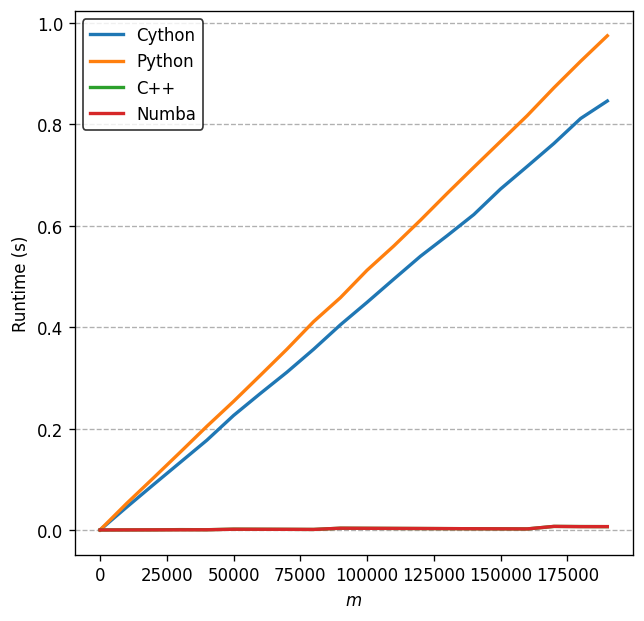

In [2]:
fig, ax = plt.subplots()
plot_runtime_comparison(
    ax,
    [
        ("Cython", load_file("cython_runtime.json")),
        ("Python", load_file("python_runtime.json")),
        ("C++", load_file("c_runtime.json")),
        ("Numba", load_file("numba_runtime.json")),
    ],
)
ax.legend()

fig_to_tex(fig, "runtime_plot.tex")

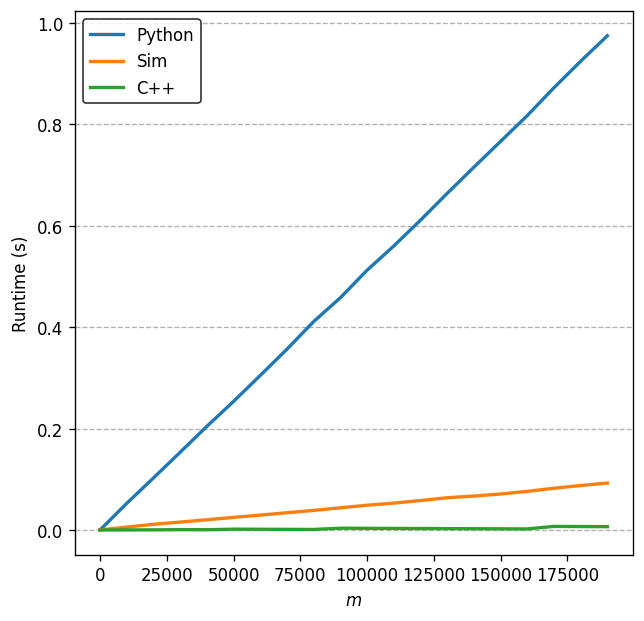

In [3]:
fig, ax = plt.subplots()
plot_runtime_comparison(
    ax,
    [
        ("Python", load_file("python_runtime.json")),
        ("Sim", load_file("sim_runtime.json")),
        ("C++", load_file("c_runtime.json")),
    ],
)
ax.legend()

fig_to_tex(fig, "sim_runtime_plot.tex")